In [11]:
import pandas as pd

In [46]:
df = pd.read_csv('data/train_imdb.csv')
# df= 11
df
# print(df.columns)

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Thriller,Reality-TV,Film-Noir,Sci-Fi,Horror,Romance,Music,Game-Show,Musical,Fantasy
0,4991,Black and White,Andrew Leman,60.0,47.0,2.0,5.0,David Mersault,19.0,NaN,...,True,False,False,False,True,False,False,False,False,True
1,8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,...,False,False,False,True,False,False,False,False,False,False
2,3728,Color,Ice Cube,22.0,104.0,0.0,498.0,Monica Calhoun,1000.0,23031390.0,...,False,False,False,False,False,False,False,False,False,False
3,1108,Black and White,Oliver Stone,339.0,141.0,0.0,404.0,Shea Whigham,749.0,47307550.0,...,True,False,False,False,False,False,False,False,False,False
4,2686,Color,Catherine Owens,68.0,85.0,0.0,44.0,The Edge,468.0,10353690.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,1369,Color,Ben Affleck,378.0,150.0,0.0,206.0,Jon Hamm,10000.0,92173235.0,...,True,False,False,False,False,False,False,False,False,False
4030,4608,Color,Amat Escalante,87.0,105.0,50.0,8.0,Andrea Vergara,327.0,NaN,...,False,False,False,False,False,True,False,False,False,False
4031,2138,Color,Richard LaGravenese,84.0,123.0,98.0,579.0,Scott Glenn,2000.0,36581633.0,...,False,False,False,False,False,False,False,False,False,False
4032,1422,Color,Randall Wallace,83.0,132.0,130.0,80.0,Anne Parillaud,29000.0,56876365.0,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df.imdb_score

0       7.3
1       7.5
2       5.6
3       6.5
4       8.4
       ... 
4029    7.6
4030    6.8
4031    7.5
4032    6.4
4033    6.7
Name: imdb_score, Length: 4034, dtype: float64

- Le nombre de film en fonction de l'année et du score
- 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def predict_imdb_score(df, features, imdb_score='imdb_score'):
    X = df[features]
    y = df[imdb_score]

    # Handle missing values
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions using the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # use the model to predict the imdb score of every movie in the dataset
    predictions = model.predict(X)

    return mse, predictions

In [153]:


# Assuming you have a DataFrame `df` with your data
# Le plus ~ juste
features = ["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]

df['predicted_imdb_score'] = predict_imdb_score(df, features)[1]
df[["movie_title", "imdb_score", "predicted_imdb_score"]].head(10)

Mean Squared Error: 1.2094672074825912


,movie_title,imdb_score,predicted_imdb_score
0,The Call of Cthulhu,7.3,6.347504
1,Avengers: Age of Ultron,7.5,6.958873
2,The Players Club,5.6,6.365993
3,Savages,6.5,6.361452
4,U2 3D,8.4,6.350653
5,Luminarias,3.6,6.369416
6,28 Days Later...,7.6,6.348451
7,Sicko,8.0,6.355329
8,War,6.3,6.607012
9,The Men Who Stare at Goats,6.2,6.834006


In [154]:
model.intercept_

-3.4972091646323715

In [155]:
model.coef_

array([1.21992665, 0.32109029])

In [ ]:
score = 5.19 + 0.0103 * duration + 2.1e-09 * gross + 2.6e-06 * cast_total_facebook_likes

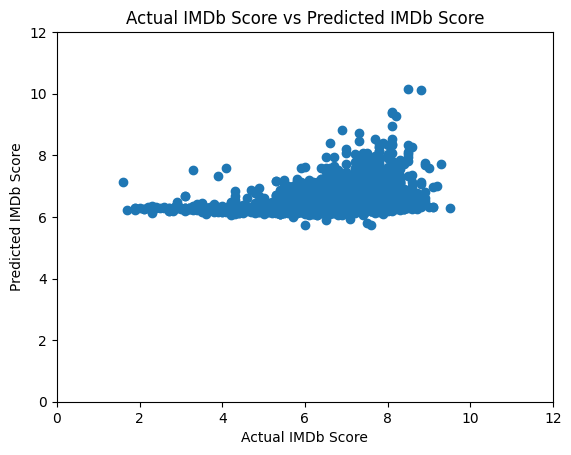

In [53]:
# display on a scatter plot the actual imdb score of the movies in the dataset vs the predicted imdb score
import matplotlib.pyplot as plt
plt.scatter(df['imdb_score'], df['predicted_imdb_score'])
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

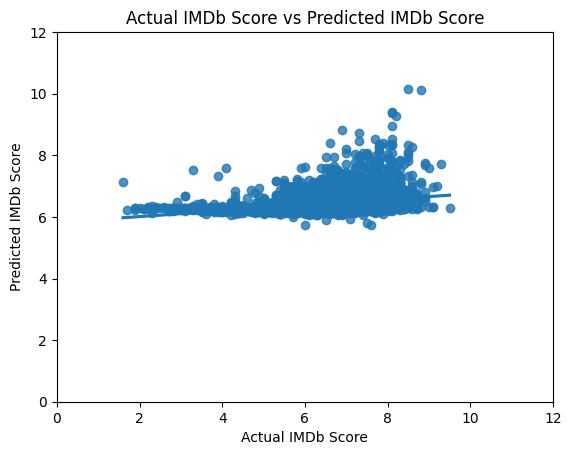

In [54]:
# display on a graph the actual imdb score of the movies in the dataset vs the predicted imdb score
import seaborn as sns
sns.regplot(x='imdb_score', y='predicted_imdb_score', data=df)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()


In [59]:
from pprint import pprint

Constituer la liste de tous les acteurs sans répétition
- Pour chaque acteur filtrer sur tous les films qu'il apparait
- Calculer la moyenne IMDB score sur ces films
- On obtient le score par acteur
- Pour chaque film, on calcule la moyenne de tous les acteurs du film

In [95]:
# get all actors in a list without duplicates
actor_1_name = df['actor_1_name'].drop_duplicates()
actor_2_name = df['actor_2_name'].drop_duplicates()
actor_3_name = df['actor_3_name'].drop_duplicates()

actors = pd.concat([actor_1_name, actor_2_name, actor_3_name]).drop_duplicates()
actors = actors.dropna()
actors


0              Dan Novy
1       Chris Hemsworth
2            Bernie Mac
3         Demián Bichir
4                  Bono
             ...       
4026     Ritchie Coster
4028       Claire Bloom
4029         Owen Burke
4030      Gabriel Reyes
4032    Judith Godrèche
Length: 5388, dtype: object

In [102]:
# Films list for each actor
films_by_actors = {}
for actor in actors:
    films_by_actors[actor] = df[(df['actor_1_name'] == actor) | (df['actor_2_name'] == actor) | (df['actor_3_name'] == actor)]['movie_title'].values

pprint(films_by_actors, compact=True)

{'50 Cent': array(["Get Rich or Die Tryin'", 'Righteous Kill', 'Southpaw',
       'Escape Plan', 'The Prince'], dtype=object),
 'A. Michael Baldwin': array(['Phantasm II'], dtype=object),
 'A.J. Buckley': array(['The In Crowd', 'Blue Car', 'Jimmy and Judy', 'The Good Dinosaur',
       'The Last Sin Eater'], dtype=object),
 'A.J. Langer': array(['Meet the Deedles'], dtype=object),
 'AJ Michalka': array(['The Lovely Bones'], dtype=object),
 'Aaliyah': array(['Queen of the Damned', 'Romeo Must Die'], dtype=object),
 'Aaron Ashmore': array(['Regression', 'Brave New Girl'], dtype=object),
 'Aaron Hill': array(['Twisted'], dtype=object),
 'Aaron Hughes': array(['You Kill Me'], dtype=object),
 'Aaron Stanford': array(['25th Hour', 'X-Men 2', 'Tadpole', 'Nikita'], dtype=object),
 'Aaron Staton': array(['August Rush'], dtype=object),
 'Aaron Yoo': array(['Demonic', 'Disturbia', 'The Wackness', 'The Good Guy'],
      dtype=object),
 'Aasheekaa Bathija': array(['Guiana 1838'], dtype=object),
 'Aa

In [103]:
# For each actor, calculate the average imdb score of the movies they played in
films_imdb_mean_by_actor = {}
for actor, films in films_by_actors.items():
    films_imdb_mean_by_actor[actor] = df[df['movie_title'].isin(films)]['imdb_score'].mean()

pprint(films_imdb_mean_by_actor, compact=True)

{'50 Cent': 5.959999999999999,
 'A. Michael Baldwin': 6.5,
 'A.J. Buckley': 6.040000000000001,
 'A.J. Langer': 3.9,
 'AJ Michalka': 6.7,
 'Aaliyah': 5.65,
 'Aaron Ashmore': 5.35,
 'Aaron Hill': 7.5,
 'Aaron Hughes': 6.5,
 'Aaron Stanford': 7.3,
 'Aaron Staton': 7.5,
 'Aaron Yoo': 6.275,
 'Aasheekaa Bathija': 7.4,
 'Aasif Mandvi': 5.95,
 'Abbie Cornish': 6.6375,
 'Abby Elliott': 5.4,
 'Abby Mukiibi Nkaaga': 7.7,
 'Abhishek Bachchan': 6.7,
 'Abigail Evans': 8.7,
 'Abigail Spencer': 6.35,
 'Abraham Benrubi': 6.65,
 'Ace Marrero': 4.1,
 'Adam Alexi-Malle': 6.4,
 'Adam Arkin': 6.4,
 'Adam Baldwin': 6.980000000000001,
 'Adam Boyer': 6.0,
 'Adam Brown': 7.766666666666667,
 'Adam Butcher': 7.6,
 'Adam DiMarco': 5.5,
 'Adam Garcia': 5.1,
 'Adam Goldberg': 6.966666666666667,
 'Adam Lamberg': 5.3,
 'Adam LeFevre': 5.9,
 'Adam Ratcliffe': 7.2,
 'Adam Rayner': 5.6,
 'Adam Sandler': 6.116666666666666,
 'Adam Scott': 6.390909090909091,
 'Adam Trese': 5.3,
 'Adel Karam': 7.2,
 'Adelaide Kane': 5.7,
 '

In [122]:
# For each film, mean all actors imdb score 
import numpy as np
actors_mean_by_film = []

for film in df.movie_title:
    # get actors of the film
    actors_of_this_film = df[df['movie_title'] == film][['actor_1_name', 'actor_2_name', 'actor_3_name']]
    actors_of_this_film = actors_of_this_film.values.flatten()

    # remove nan
    actors_of_this_film = actors_of_this_film[~pd.isnull(actors_of_this_film)]

    #average of the actors
    actors_score = []
    for actor in actors_of_this_film:
        actors_score.append(films_imdb_mean_by_actor[actor])

    if len(actors_score) == 0:
        actors_mean_by_film.append(np.nan)
    else:
        actors_mean_by_film.append(sum(actors_score) / len(actors_score))

df['actors_mean_imdb_score'] = actors_mean_by_film

Mean Squared Error: 0.33181436175004286


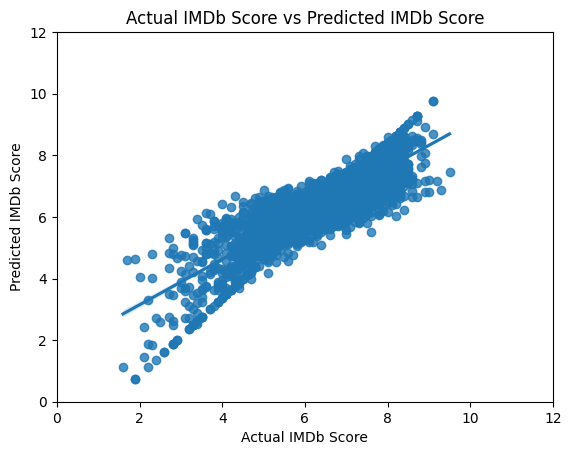

In [156]:
# predict actors_mean_imdb_score
features = ["actors_mean_imdb_score"]

df['predicted_imdb_score_with_actors'] = predict_imdb_score(df, features)[1]
# df[["movie_title", "imdb_score", "predicted_imdb_score_with_actors"]].head(10)

# display on a scatter plot the actual imdb score of the movies in the dataset vs the predicted imdb score
# plt.scatter(df['imdb_score'], df['predicted_imdb_score_with_actors'])
# plt.xlabel('Actual IMDb Score')
# plt.ylabel('Predicted IMDb Score')
# plt.title('Actual IMDb Score vs Predicted IMDb Score')
# plt.xlim(0, 12)
# plt.ylim(0, 12)
# plt.show()

# seaborn
sns.regplot(x='imdb_score', y='predicted_imdb_score_with_actors', data=df)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()


In [121]:
df[["movie_title", "imdb_score", "predicted_imdb_score_with_actors"]]

,movie_title,imdb_score,predicted_imdb_score_with_actors
0,The Call of Cthulhu,7.3,7.509982
1,Avengers: Age of Ultron,7.5,7.085186
2,The Players Club,5.6,5.371427
3,Savages,6.5,6.789184
4,U2 3D,8.4,8.345690
...,...,...,...
4029,The Town,7.6,7.074763
4030,Heli,6.8,6.883202
4031,Freedom Writers,7.5,6.937920
4032,The Man in the Iron Mask,6.4,6.850213


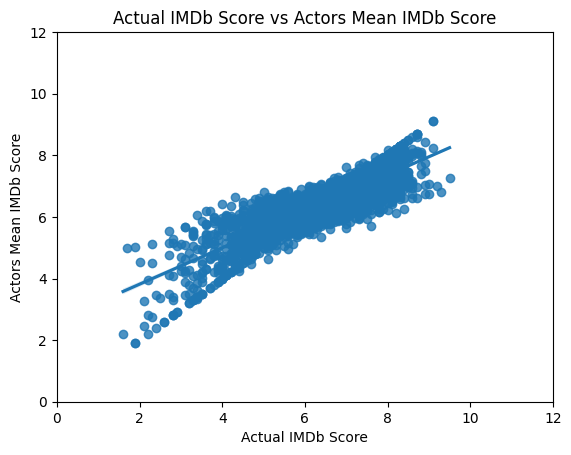

In [116]:
# Sans predict
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='imdb_score', y='actors_mean_imdb_score', data=df)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Actors Mean IMDb Score')
plt.title('Actual IMDb Score vs Actors Mean IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

In [157]:
# Do the same with genres
# get all genres in a list without duplicates
genres = df['genres'].drop_duplicates()
genres = genres.dropna()
genres = genres.str.split('|').explode().drop_duplicates()
genres

# Films list for each genre
films_by_genres = {}
for genre in genres:
    films_by_genres[genre] = df[df['genres'].str.contains(genre)]['movie_title'].values

# pprint(films_by_genres, compact=True)

# For each genre, calculate the average imdb score of the movies they played in
films_imdb_mean_by_genre = {}
for genre, films in films_by_genres.items():
    films_imdb_mean_by_genre[genre] = df[df['movie_title'].isin(films)]['imdb_score'].mean()

# pprint(films_imdb_mean_by_genre, compact=True)

# For each film, mean all genres imdb score
genres_mean_by_film = []

for film in df.movie_title:
    # get genres of the film
    genres_of_this_film = df[df['movie_title'] == film]['genres'].str.split('|').values.flatten()

    # remove nan
    genres_of_this_film = genres_of_this_film[~pd.isnull(genres_of_this_film)]

    # print(genres_of_this_film)

    #average of the genres
    genres_score = []
    for genre in genres_of_this_film[0]:
        genres_score.append(films_imdb_mean_by_genre[genre])


    if len(genres_score) == 0:
        genres_mean_by_film.append(np.nan)
    else:
        genres_mean_by_film.append(sum(genres_score) / len(genres_score))

df['genres_mean_imdb_score'] = genres_mean_by_film


# predict genres_mean_imdb_score
features = ["genres_mean_imdb_score"]

df['predicted_imdb_score_with_genres'] = predict_imdb_score(df, features)[1]
df[["movie_title", "imdb_score", "predicted_imdb_score_with_genres"]].head(10)

# # display on a scatter plot the actual imdb score of the movies in the dataset vs the predicted imdb score
# plt.scatter(df['imdb_score'], df['predicted_imdb_score_with_genres'])
# plt.xlabel('Actual IMDb Score')
# plt.ylabel('Predicted IMDb Score')
# plt.title('Actual IMDb Score vs Predicted IMDb Score')
# plt.xlim(0, 12)
# plt.ylim(0, 12)
# plt.show()

Mean Squared Error: 1.015704767179652


,movie_title,imdb_score,predicted_imdb_score_with_genres
0,The Call of Cthulhu,7.3,6.041203
1,Avengers: Age of Ultron,7.5,6.178890
2,The Players Club,5.6,6.475621
3,Savages,6.5,6.580898
4,U2 3D,8.4,7.136044
5,Luminarias,3.6,6.176043
6,28 Days Later...,7.6,6.147887
7,Sicko,8.0,7.373537
8,War,6.3,6.242613
9,The Men Who Stare at Goats,6.2,6.725141


Mean Squared Error: 0.3217176435932533


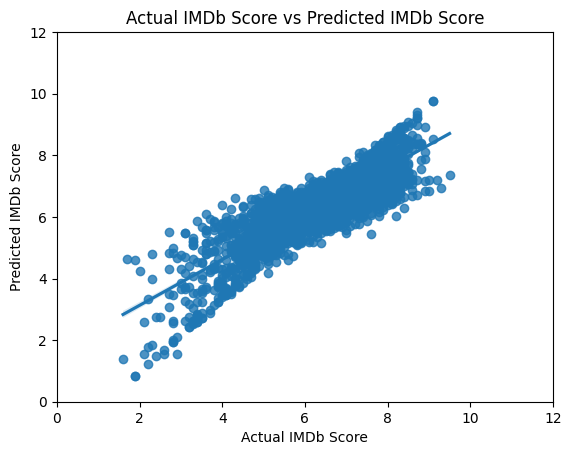

In [158]:
# combine actors and genres
features = ["actors_mean_imdb_score", "genres_mean_imdb_score"]
df['predicted_imdb_score_with_actors_and_genres'] = predict_imdb_score(df, features)[1]
df[["movie_title", "imdb_score", "predicted_imdb_score_with_actors_and_genres"]]


# seaborn
sns.regplot(x='imdb_score', y='predicted_imdb_score_with_actors_and_genres', data=df)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()


In [160]:
model.coef_

array([1.21992665, 0.32109029])

In [161]:
#"imdb_score" "predicted_imdb_score_with_actors_and_genres" deffirence in percentage
df['diff'] = (df['imdb_score'] - df['predicted_imdb_score_with_actors_and_genres']) / df['imdb_score'] * 100
df['diff']

0       -1.574031
1        6.327686
2        3.407245
3       -4.726131
4       -0.218772
          ...    
4029     6.774807
4030    -1.665209
4031     6.099186
4032    -6.239842
4033   -11.399767
Name: diff, Length: 4034, dtype: float64